In [1]:
df = pd.read_csv('50_startups.csv')

<IPython.core.display.Javascript object>

In [2]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1::]

In [4]:
state = pd.get_dummies(x.State,drop_first=True)
state.head()

<IPython.core.display.Javascript object>

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [5]:
x.drop('State',axis=1,inplace=True)

In [6]:
x = pd.concat([x,state],axis=1)

<IPython.core.display.Javascript object>

In [7]:
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(x_test)

In [11]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.9347068473282423

## Additional gibberish (not required)

<IPython.core.display.Javascript object>

C:\Users\stewa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

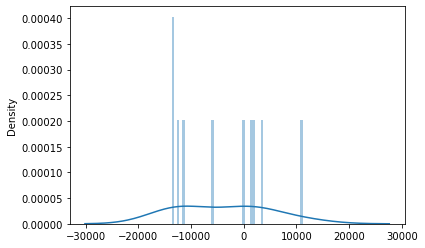

In [12]:
sns.distplot(y_pred-y_test,bins=50)

In [15]:
y_p = pd.DataFrame(y_pred).loc[:,0].tolist()
y_t = y_test.Profit.to_list()

<IPython.core.display.Javascript object>

In [16]:
y_tp = []

for index in range(len(y_p)):
    y_tp.append(y_p[index] - y_t[index] )
y_tp

[-267.1784020382038,
 -11677.122391844372,
 -13674.211548255233,
 -5822.731487421042,
 -12512.907789449382,
 11152.932301651017,
 -13377.367903243765,
 1308.1737468744977,
 3617.1853301244264,
 1733.12569550419]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Count'>

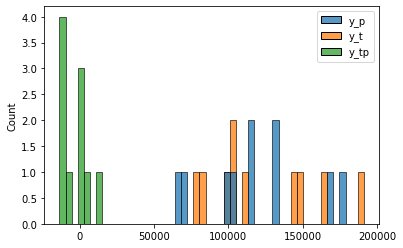

In [17]:
df_test = pd.DataFrame([y_p,y_t,y_tp]).transpose()
df_test.columns = ['y_p','y_t','y_tp']
sns.histplot(df_test,bins=50)

In [18]:
df_test

,y_p,y_t,y_tp
0,103015.201598,103282.38,-267.178402
1,132582.277608,144259.40,-11677.122392
2,132447.738452,146121.95,-13674.211548
3,71976.098513,77798.83,-5822.731487
4,178537.482211,191050.39,-12512.907789
5,116161.242302,105008.31,11152.932302
6,67851.692097,81229.06,-13377.367903
7,98791.733747,97483.56,1308.173747
8,113969.435330,110352.25,3617.185330
9,167921.065696,166187.94,1733.125696
